## Data and Metrics on Water and Energy Consumption in NYC Buildings
### Includes privately owned buildings over 25,000ft2 and City buildings of over 10,000ft2
(Reporting this data is required under Local Law 84)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
! ls

Energy_and_Water_Data_Disclosure_for_Local_Law_84_2020__Data_for_Calendar_Year_2019_.csv
Energy_and_Water_Data_Disclosure_for_Local_Law_84_2022__Data_for_Calendar_Year_2021_.csv
LL84_Data_Caledar_Year-Data_Dictionary.xlsx
by_census.csv
by_zipcode.csv
distributions.ipynb
exploration.ipynb
output
~$LL84_Data_Caledar_Year-Data_Dictionary.xlsx


Downloaded the latest available data for 2022 from [NYC Open Data](https://data.cityofnewyork.us/Environment/Energy-and-Water-Data-Disclosure-for-Local-Law-84-/7x5e-2fxh). 

Same dataset that was used for this [map](https://energy.cusp.nyu.edu/#/), but it hasn't been updated since 2017.

In [4]:
df = pd.read_csv('./raw data/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2022__Data_for_Calendar_Year_2021_.csv')

/var/folders/_0/x7xh_2c16jq4chdcqrg28fr40000gn/T/ipykernel_33838/2040647974.py:1: DtypeWarning: Columns (9,15,216,217) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Energy_and_Water_Data_Disclosure_for_Local_Law_84_2022__Data_for_Calendar_Year_2021_.csv')


## Dataset Overview:

In [5]:
df

,Property Id,Property Name,Parent Property Id,Parent Property Name,Year Ending,"NYC Borough, Block and Lot (BBL)",NYC Building Identification Number (BIN),Address 1,City,Postal Code,Primary Property Type - Self Selected,Primary Property Type - Portfolio Manager-Calculated,National Median Reference Property Type,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Construction Status,Number of Buildings,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,National Median ENERGY STAR Score,Target ENERGY STAR Score,Reason(s) for No Score,ENERGY STAR Certification - Year(s) Certified (Score),ENERGY STAR Certification - Eligibility,ENERGY STAR Certification - Last Approval Date,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),National Median Site EUI (kBtu/ft²),Site Energy Use (kBtu),Weather Normalized Site Energy Use (kBtu),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Source EUI (kBtu/ft²),Weather Normalized Source EUI (kBtu/ft²),National Median Source EUI (kBtu/ft²),Source Energy Use (kBtu),Weather Normalized Source Energy Use (kBtu),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),Propane Use (kBtu),District Steam Use (kBtu),District Hot Water Use (kBtu),District Chilled Water Use (kBtu),Natural Gas Use (kBtu),Natural Gas Use (therms),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Electricity Use - Grid Purchase (kWh),Weather Normalized Site Electricity (kWh),Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kWh),Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kBtu),Electricity Use – Generated from Onsite Renewable Systems and Used Onsite (kWh),Electricity Use – Generated from Onsite Renewable Systems and Used Onsite (kBtu),Electricity Use – Generated from Onsite Renewable Systems (kWh),Electricity Use – Generated from Onsite Renewable Systems and Exported (kWh),Annual Maximum Demand (kW),Annual Maximum Demand (MM/YYYY),Annual Maximum Demand (Meter Name (Meter ID)),Green Power - Onsite (kWh),Green Power - Offsite (kWh),Green Power - Onsite and Offsite (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Total GHG Emissions Intensity (kgCO2e/ft²),Direct GHG Emissions Intensity (kgCO2e/ft²),Indirect GHG Emissions (Metric Tons CO2e),Net Emissions (Metric Tons CO2e),Indirect GHG Emissions Intensity (kgCO2e/ft²),National Median Total GHG Emissions (Metric Tons CO2e),eGRID Output Emissions Rate (kgCO2e/MBtu),Avoided Emissions - Onsite Green Power (Metric Tons CO2e),Avoided Emissions - Offsite Green Power (Metric Tons CO2e),Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e),Percent of Electricity that is Green Power,Percent of RECs Retained,Percent of Total Electricity Generated from Onsite Renewable Systems,LEED US Project ID,Adult Education - Gross Floor Area (ft²),Ambulatory Surgical Center - Gross Floor Area (ft²),Automobile Dealership - Gross Floor Area (ft²),Bank Branch - Gross Floor Area (ft²),Barracks- Gross Floor Area (ft²),College/University - Gross Floor Area (ft²),Convention Center - Gross Floor Area (ft²),Courthouse - Gross Floor Area (ft²),Data Center - Gross Floor Area (ft²),Data Center - UPS System Redundancy,Data Center - Cooling Equipment Redundancy,Data Center - IT Energy Configuration,Data Center - Energy Estimates Applied,Data Center - UPS Output Meter (kWh),Data Center - PDU Input Meter (kWh),Data Center - PDU Output Meter (kWh),Data Center - IT Equipment Input Meter (kWh),Data Center - IT Site Energy (kWh),Data Center - IT Source Energy (kBtu),Data Center - PUE,Dat

In [6]:
df.columns = df.columns.str.replace(' ', '_')

In [7]:
df.columns

Index(['Property_Id', 'Property_Name', 'Parent_Property_Id',
       'Parent_Property_Name', 'Year_Ending',
       'NYC_Borough,_Block_and_Lot_(BBL)',
       'NYC_Building_Identification_Number_(BIN)', 'Address_1', 'City',
       'Postal_Code',
       ...
       'Number_of_Active_IT_Meters', 'Generation_Date', 'Submission_Date',
       'Latitude', 'Longitude', 'Community_Board', 'Council_District',
       'Census_Tract', 'NTA', 'Borough'],
      dtype='object', length=249)

In [8]:
# show all the columns

pd.set_option('display.max_columns', None)

Narrowing the dataframe - based on looking for relevant columns in the data dictionary. Keepning the 29 columns (out of 249) that are relevant:

In [9]:
df = df[['Property_Id', 'Property_Name', 'Parent_Property_Id',
       'Parent_Property_Name', 'Year_Ending',
       'NYC_Borough,_Block_and_Lot_(BBL)',
       'NYC_Building_Identification_Number_(BIN)', 'Address_1', 'City',
       'Postal_Code', 'Council_District', 'Borough', 'Census_Tract', 'Primary_Property_Type_-_Self_Selected', 'Primary_Property_Type_-_Portfolio_Manager-Calculated', 'National_Median_Reference_Property_Type', 'List_of_All_Property_Use_Types_at_Property', 'Largest_Property_Use_Type', 'Year_Built', 'Number_of_Buildings', 'Occupancy', 'Site_EUI_(kBtu/ft²)', 'Site_Energy_Use_(kBtu)', 'Total_GHG_Emissions_(Metric_Tons_CO2e)', 'Direct_GHG_Emissions_(Metric_Tons_CO2e)', 'Property_GFA_-_Self-Reported_(ft²)', 'Property_GFA_-_Calculated_(Buildings_and_Parking)_(ft²)', 'Latitude', 'Longitude']]

In [10]:
df

,Property_Id,Property_Name,Parent_Property_Id,Parent_Property_Name,Year_Ending,"NYC_Borough,_Block_and_Lot_(BBL)",NYC_Building_Identification_Number_(BIN),Address_1,City,Postal_Code,Council_District,Borough,Census_Tract,Primary_Property_Type_-_Self_Selected,Primary_Property_Type_-_Portfolio_Manager-Calculated,National_Median_Reference_Property_Type,List_of_All_Property_Use_Types_at_Property,Largest_Property_Use_Type,Year_Built,Number_of_Buildings,Occupancy,Site_EUI_(kBtu/ft²),Site_Energy_Use_(kBtu),Total_GHG_Emissions_(Metric_Tons_CO2e),Direct_GHG_Emissions_(Metric_Tons_CO2e),Property_GFA_-_Self-Reported_(ft²),Property_GFA_-_Calculated_(Buildings_and_Parking)_(ft²),Latitude,Longitude
0,21205224,Astoria Blvd Property,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2021,4006520042,4538607,36-16 Astoria Blvd.,Long Island City,11103,22.0,QUEENS,6502.0,Multifamily Housing,Multifamily Housing,Fannie Mae Industry Survey - Multifamily,"Multifamily Housing, Parking",Multifamily Housing,2010,1,100,66.7,1666390.8,107.5,56.4,25000.0,34146.0,40.769272,-73.913633
1,2665352,Stellar - 70 West 93rd Street,20599688,Stellar - Campus West 93rd Street,12/31/2021,1-01206-0001,1031627,70 West 93rd Street,New York,10025,6.0,MANHATTAN,177.0,Multifamily Housing,Multifamily Housing,Fannie Mae Industry Survey - Multifamily,"Multifamily Housing, Office",Multifamily Housing,1970,1,100,19.2,5022480.9,398.6,43.9,261980.0,261980.0,40.790503,-73.967920
2,2665400,Stellar - 28-50 West 97th Street,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2021,1-01832-0043,1055265,28-50 West 97th Street,New York,10025,7.0,MANHATTAN,181.0,Multifamily Housing,Multifamily Housing,Fannie Mae Industry Survey - Multifamily,"Medical Office, Multifamily Housing, Parking",Multifamily Housing,1943,1,100,66.9,22315905.8,1323,952.7,333342.0,363092.0,40.792758,-73.965171
3,2665405,Stellar - 310 Greenwich St,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2021,1-00142-0025,1083157;1083235;1083237;1083240;1083241;108324...,310 Greenwich Street / 40 Harrison Street,New York,10013,NaN,NaN,NaN,Multifamily Housing,Multifamily Housing,Fannie Mae Industry Survey - Multifamily,"Multifamily Housing, Parking, Retail Store",Multifamily Housing,1975,3,100,113.8,126690147.9,7582.1,5332.9,1112900.0,1345900.0,NaN,NaN
4,2665415,Stellar - 87 Hamilton Place,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2021,1-02072-0039,1061772,87 Hamilton Place,New York,10031,7.0,MANHATTAN,225.0,Multifamily Housing,Multifamily Housing,Fannie Mae Industry Survey - Multifamily,Multifamily Housing,Multifamily Housing,1941,1,100,114.6,8329013.8,483.4,373.1,72662.0,72662.0,40.823008,-73.950670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29837,6245271,"A&Y Management, Inc.",Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2021,4-01538-0016,4038525,79-20 BARNWELL AVENUE,ELMHURST,11373,25.0,QUEENS,485.0,Distribution Center,Distribution Center,CBECS - Unrefrigerated Warehouse & Distributio...,Distribution Center,Distribution Center,1964,1,80,49.4,1350014.3,76.8,58.7,27305.0,27305,40.738733,-73.884231
29838,8886078,* TEST - Flatiron Building,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2021,Not Available,Not Available,175 5th Avenue,New York,10010,2.0,MANHATTAN,56.0,Mixed Use Property,Office,CBECS - Office & Bank/Financial,"Office, Retail Store",Office,1903,2,90,Not Available,Not Available,Not Available,Not Available,183449.0,183449,40.741132,-73.989870
29839,6317603,Five Boro Storage,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2021,2-02319-0098,2000789,220 east 134th Street,Bronx,10451,8.0,BRONX,51.0,Mixed Use Property,Office,CBECS - Office & Bank/Financial,Office,Office,1955,1,100,46.2,1812192.7,113.6,51.8,39264.0,39264,40.809255,-73.930650

## Where are most of these buildings located?

In [11]:
by_borough = df["Borough"].value_counts().reset_index()

In [12]:
by_borough.columns = ["Borough", "Count"]

In [13]:
by_borough['Percentage'] = round(by_borough['Count']*100/by_borough['Count'].sum())

In [14]:
by_borough

,Borough,Count,Percentage
0,MANHATTAN,10484,37.0
1,BROOKLYN,7175,25.0
2,BRONX,5553,19.0
3,QUEENS,4929,17.0
4,STATEN IS,578,2.0


- Most are located in Manhattan
- Almost none in Staten Island (which is interesting because council members there have voted to delay it)

In [15]:
by_district = df["Council_District"].value_counts().reset_index()

In [16]:
by_district.columns = ["Council_District", "Count"]

In [17]:
by_district.sort_values(by='Count', ascending=False).head()

,Council_District,Count
0,4.0,1978
1,3.0,1735
2,1.0,1258
3,10.0,966
4,6.0,959


In [18]:
by_district.sort_values(by='Count', ascending=False).tail()

,Council_District,Count
46,32.0,173
47,50.0,165
48,46.0,140
49,51.0,118
50,28.0,85


- Most are located in Midtown and the Financial District

In [19]:
by_district.Count.median()

443.0

(array([5., 7., 8., 8., 2., 2., 5., 3., 4., 4., 0., 0., 1., 0., 0., 0., 0.,
        1., 0., 1.]),
 array([  85.  ,  179.65,  274.3 ,  368.95,  463.6 ,  558.25,  652.9 ,
         747.55,  842.2 ,  936.85, 1031.5 , 1126.15, 1220.8 , 1315.45,
        1410.1 , 1504.75, 1599.4 , 1694.05, 1788.7 , 1883.35, 1978.  ]),
 <BarContainer object of 20 artists>)

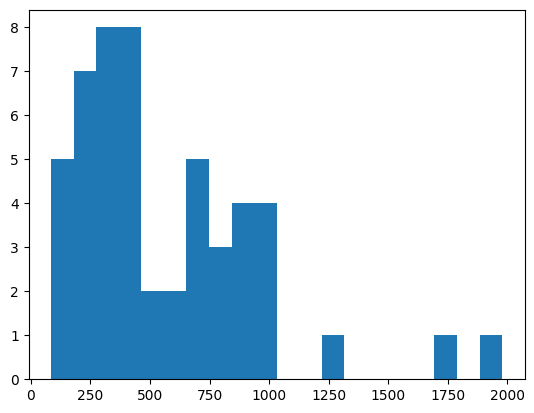

In [20]:
plt.hist(by_district.Count, bins=20)

## What kind of buildings are these?

In [21]:
df["Primary_Property_Type_-_Self_Selected"].value_counts()

Multifamily Housing     19203
Office                   2405
K-12 School              1872
Hotel                     566
College/University        481
                        ...  
Lifestyle Center            2
Convention Center           1
Other - Stadium             1
Bar/Nightclub               1
Fast Food Restaurant        1
Name: Primary_Property_Type_-_Self_Selected, Length: 79, dtype: int64

In terms of number of entries - the vast majority have a primary use of Multifamily Housing, followed by Office. 

In [22]:
area_by_type = df.groupby("Primary_Property_Type_-_Self_Selected")["Property_GFA_-_Self-Reported_(ft²)"].sum().reset_index()

In [23]:
area_by_type.columns = ["Primary_Property_Type_-_Self_Selected", "Area_ft2"]

In [24]:
# round area 

area_by_type["Area_ft2"] = round(area_by_type["Area_ft2"])

In [25]:
area_by_type["Area_Percentage"] = area_by_type["Area_ft2"]*100/area_by_type["Area_ft2"].sum()

In [26]:
area_by_type.Area_Percentage.sum()

100.0

In [27]:
area_by_type["Area_Percentage"] = round(area_by_type["Area_Percentage"])

In [28]:
area_by_type[area_by_type["Area_Percentage"]>0].sort_values(by="Area_Percentage", ascending=False)

,Primary_Property_Type_-_Self_Selected,Area_ft2,Area_Percentage
34,Multifamily Housing,2.197375e+09,59.0
37,Office,5.504863e+08,15.0
25,K-12 School,2.089262e+08,6.0
7,College/University,8.797646e+07,2.0
20,Hospital (General Medical & Surgical),8.244772e+07,2.0
21,Hotel,7.377800e+07,2.0
12,Enclosed Mall,2.084030e+07,1.0
15,Financial Office,2.467281e+07,1.0
30,Manufacturing/Industrial Plant,2.580018e+07,1.0
32,Mixed Use Property,4.311995e+07,1.0


When looking by area too, it's multifamily housing that accounts for the most area, followed by Office.

## What kind of buildings account for the greatest emissions? 

In [29]:
df = df.replace('Not Available', np.nan)

In [30]:
df["Site_Energy_Use_(kBtu)"] = df["Site_Energy_Use_(kBtu)"].astype(float)

In [31]:
emissions_by_type = df.groupby("Primary_Property_Type_-_Self_Selected")["Site_Energy_Use_(kBtu)"].sum().reset_index()

In [32]:
emissions_by_type.sort_values(by="Site_Energy_Use_(kBtu)", ascending=False)

,Primary_Property_Type_-_Self_Selected,Site_Energy_Use_(kBtu)
34,Multifamily Housing,1.662248e+11
65,Senior Living Community,1.298103e+11
37,Office,5.744175e+10
20,Hospital (General Medical & Surgical),1.904226e+10
7,College/University,1.531077e+10
...,...,...
54,"Personal Services (Health/Beauty, Dry Cleaning...",4.796603e+06
5,Bar/Nightclub,2.797172e+06
14,Fast Food Restaurant,1.217830e+06
8,Convention Center,1.034251e+06


In [33]:
merged = pd.merge(emissions_by_type, area_by_type, on="Primary_Property_Type_-_Self_Selected")

In [34]:
merged["Use_by_Area"] = merged["Site_Energy_Use_(kBtu)"]/merged["Area_ft2"]

In [35]:
merged.sort_values(by="Use_by_Area", ascending=False).head(15)

,Primary_Property_Type_-_Self_Selected,Site_Energy_Use_(kBtu),Area_ft2,Area_Percentage,Use_by_Area
65,Senior Living Community,1.298103e+11,16613541.0,0.0,7813.522069
19,Food Service,1.655580e+09,1110836.0,0.0,1490.390733
13,Energy/Power Station,5.920519e+08,488280.0,0.0,1212.525383
78,Zoo,7.535234e+08,1408841.0,0.0,534.853395
14,Fast Food Restaurant,1.217830e+06,3152.0,0.0,386.367386
46,Other - Services,6.030631e+07,172783.0,0.0,349.029194
75,Wastewater Treatment Plant,2.761378e+09,10187529.0,0.0,271.054704
26,Laboratory,3.222775e+09,12106667.0,0.0,266.198375
73,Veterinary Office,3.866849e+07,153685.0,0.0,251.608747
49,Other - Technology/Science,1.338112e+09,5510939.0,0.0,242.810222


- Senior Living community does not account for much area at all but has a disproportionately high amount of emissions.
- Food service also seems to account for more, fast food restaurants too. 

## Isolating individual buildings that have the highest emissions:

In [36]:
df.sort_values(by="Site_Energy_Use_(kBtu)", ascending=False).head(10)

,Property_Id,Property_Name,Parent_Property_Id,Parent_Property_Name,Year_Ending,"NYC_Borough,_Block_and_Lot_(BBL)",NYC_Building_Identification_Number_(BIN),Address_1,City,Postal_Code,Council_District,Borough,Census_Tract,Primary_Property_Type_-_Self_Selected,Primary_Property_Type_-_Portfolio_Manager-Calculated,National_Median_Reference_Property_Type,List_of_All_Property_Use_Types_at_Property,Largest_Property_Use_Type,Year_Built,Number_of_Buildings,Occupancy,Site_EUI_(kBtu/ft²),Site_Energy_Use_(kBtu),Total_GHG_Emissions_(Metric_Tons_CO2e),Direct_GHG_Emissions_(Metric_Tons_CO2e),Property_GFA_-_Self-Reported_(ft²),Property_GFA_-_Calculated_(Buildings_and_Parking)_(ft²),Latitude,Longitude
17900,6720128,St. Barnabas Nursing Home 1,19491105,St. Barnabas Parent,12/31/2021,2030640001,2094217,4422 3rd Avenue,Bronx,10457,15.0,BRONX,37504.0,Senior Living Community,Senior Living Community,Industry Survey,Senior Living Community,Senior Living Community,1943,1,100,760095.9,6.403580e+10,4250113.4,8652.4,84247.0,84247,40.853346,-73.891611
17907,19491105,St. Barnabas Parent,19491105,St. Barnabas Parent,12/31/2021,2030640001; 2030640010,2094217; 2094219; 2094220; 2118237; 2123736; 2...,2175 Quarry Road,Bronx,10457,15.0,BRONX,37504.0,Senior Living Community,Senior Living Community,Industry Survey,"Hospital (General Medical & Surgical), Senior ...",Senior Living Community,1943,6,100,122868.4,6.403580e+10,4250113.4,8652.4,521174.0,521174,40.852341,-73.890409
25495,13998856,DHQ CMT Markle - 2019+,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2021,1006090023,1010639,120 West 14th Street,New York,10003,3.0,MANHATTAN,71.0,Office,Office,CBECS - Office & Bank/Financial,"Office, Residence Hall/Dormitory, Worship Faci...",Office,1930,1,90,97320.2,1.776620e+10,1179694.6,38.6,182554.0,182554,40.737704,-73.997676
18086,12423723,Columbia University Main Campus,12423723,Columbia University Main Campus,12/31/2021,1018670042;1018670052;1018670054;1018670064;10...,1085710;1056050;1056051;1056054;1056057;105605...,116 Street,New York,10027,NaN,NaN,NaN,College/University,College/University,CBECS - College/University,"College/University, Multifamily Housing, Resid...",College/University,1910,60,100,478.7,3.300500e+09,209478,43205.2,6895156.0,6895156,NaN,NaN
12491,5925243,Co-Op City,5925243,Co-Op City,12/31/2021,2051410120; 2051410700; 2051410600; 2051350210...,2123738 ;\t2123740 ;\t2123742 ; 2103128 ;\...,Co-Op City Boulevard,Bronx,10475,NaN,NaN,NaN,Multifamily Housing,Multifamily Housing,Fannie Mae Industry Survey - Multifamily,"Energy/Power Station, Multifamily Housing, Par...",Multifamily Housing,1971,9,100,131.3,2.777657e+09,149264.4,144302.4,21150159.0,22042704.0,NaN,NaN
18509,8726877,Pratt S.I. Campus - Total,8726877,Pratt S.I. Campus - Total,12/31/2021,5/02705/0225 - 5/02705/0220,5041883-5164932,4435 Victory Boulevard,Staten Island,10314,50.0,STATEN IS,29102.0,Manufacturing/Industrial Plant,Manufacturing/Industrial Plant,NaN,Manufacturing/Industrial Plant,Manufacturing/Industrial Plant,1996,2,100,5146.9,2.257054e+09,130468.7,92683.2,438530.0,438530,40.586217,-74.200825
7037,7728389,Spring Creek Towers,7728389,Spring Creek Towers,12/31/2021,3-04452-0085;3-04435-0001;3-04452-0001;3-04452...,3336175 ;3336174 ;3336176 ;3336177 ;333617...,165 Elmira Loop,Brooklyn,11239,42.0,BROOKLYN,105801.0,Multifamily Housing,Multifamily Housing,Fannie Mae Industry Survey - Multifamily,"Bank Branch, Energy/Power Station, Fast Food R...",Multifamily Housing,1975,58,100,242.3,1.870995e+09,99784.7,99784.7,7721401.0,9267653.0,40.649131,-73.879665
10635,21354329,Benchmarking Group - 211,21354329,Benchmarking Group - 211,12/31/2021,2026050040,2109475; 2999999; 2109476; 2116651; 2000000; 2...,Rikers Island,Bronx,11370,22.0,QUEENS,1.0,Prison/Incarceration,Prison/Incarceration,CBECS - Public Order and Safety,"Parking, Prison/Incarceration",Prison/Incarceration,1933,69,100,285.2,1.704913e+09,92930.6,84642.1,5978573.0,5986373.0,40.790576,-73.881894
10699,2135

Kind of difficult to make generalizations here. In the top then we have: 

- A nursing home in the Bronx
- Another nursing home in the Bronx (that is also a hospital?)
- An office tower at 120 West 14th St
- Columbia University's Main Campus 
- Co-Op City in the Bronx
- Pratt's Staten Island Campus 
- Multifamily housing buildings (165 Elmira Loop) in Brooklyn
- Riker's prison (are they exempt from the rules?) + Riker's Island bakery (?)
- NYU Washington Square CoGen campus 